In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from os.path import expanduser
from tqdm import tqdm
HOME = expanduser("~")
import os
import cv2
import math
import pandas as pd
from skimage.transform import resize
from skimage.exposure import rescale_intensity, adjust_gamma
from scipy.ndimage.interpolation import map_coordinates
from skimage.util import img_as_ubyte
from skimage.exposure import equalize_hist
#%matplotlib inline

In [8]:
#DIR = os.path.join(HOME, 'programming', 'dk39')
DIR = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK39'
ALIGNED = os.path.join(DIR, 'preps', 'aligned')
NORMALIZED = os.path.join(DIR, 'preps', 'normalized')
CLEANED = os.path.join(DIR, 'preps', 'cleaned')
INPUT = CLEANED
#OUTPUT = NORMALIZED
files = sorted(os.listdir(INPUT))
#masks = sorted(os.listdir(MASKED))

In [9]:
def rescale_intensity_v2(im, low, high):
    """
    Linearly map `low` to 0 and `high` to 255.
    Args:
        im (2d array of float): input image.
    """

    if low > high:
        im_out = rescale_intensity(low-im.astype(np.float), (0, low-high), (0, 60000)).astype(np.uint16)
    else:
        im_out = rescale_intensity(im.astype(np.float), (low, high), (0, )).astype(np.uint16)
    return im_out


In [ ]:
print(len(files), len(masks))

In [40]:
# get oriented for comparison
file_inputs = []
img_inputs = []
img_normal = []
img_one_adapt = []
img_two_adapt = []
low = 0
high = 40000
gamma_map = img_as_ubyte(adjust_gamma(np.arange(0, 60001, 1) / 60000, 16.))
clahe1 = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8,8))
clahe2 = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8,8))

for i, file in enumerate(tqdm(files)):
    file_inputs.append(file)
    
    infile = os.path.join(INPUT, file)
    img = cv2.imread(infile, -1)
    img_inputs.append(img)
    
    
    img1 = clahe1.apply(img)
    img_one_adapt.append(img1)
    del img1
    #normfile = os.path.join(NORMALIZED, file)
    #img = cv2.imread(normfile, -1)
    #img_normal.append(img)
    img2 = clahe2.apply(img)
    img_two_adapt.append(img2)
    del img
    del img2


100%|██████████| 469/469 [00:20<00:00, 23.41it/s]


In [5]:
print(len(img_outputs), len(file_inputs) )

469 469


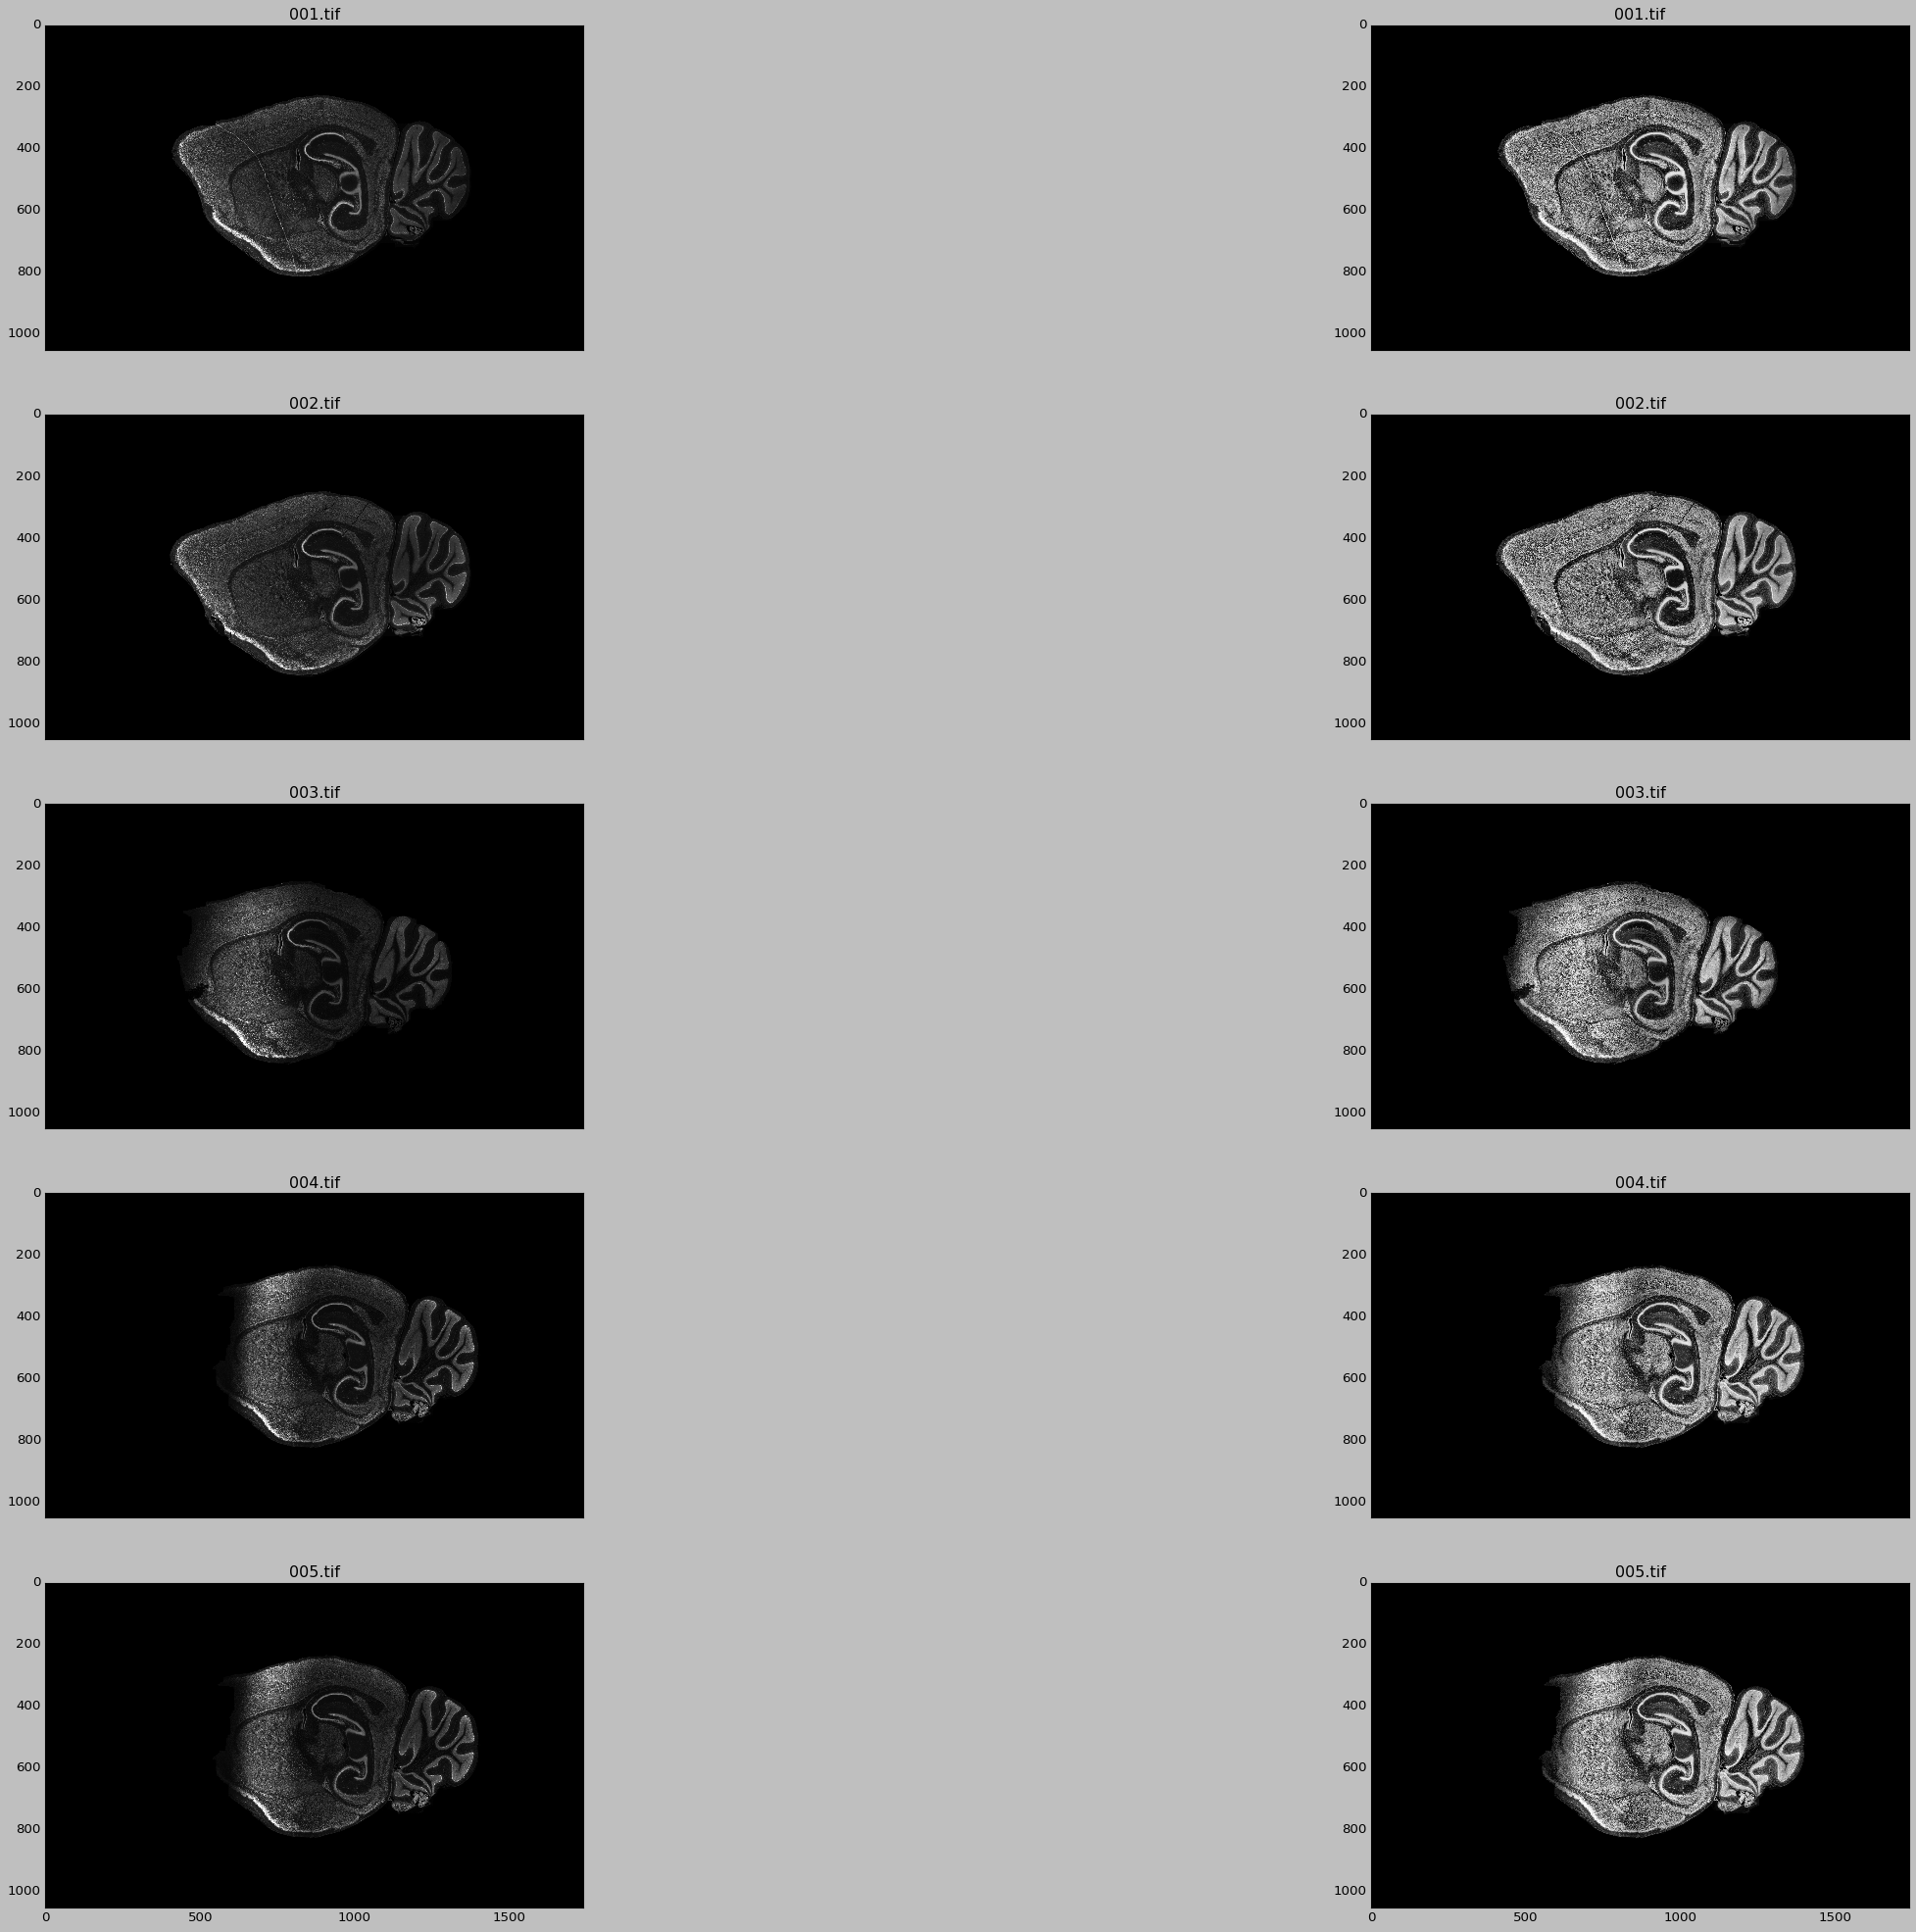

In [15]:
start, finish = (110,115)
tfiles = file_inputs[start:finish]
ins = img_inputs[start:finish]
outs = img_outputs[start:finish]
fig, ax = plt.subplots(nrows=len(tfiles), ncols=2, sharex=True)
plt.style.use('classic')
#plt.rcParams.update({'figure.figsize': [5,16]})
i = 0
for old, new, filename in zip(ins, outs, files):
    ax[i,0].set_title(filename)
    ax[i,0].imshow(old, cmap='gray')

    ax[i,1].set_title(filename)
    ax[i,1].imshow(new, cmap='gray')
    i += 1
fig.set_size_inches(np.array(fig.get_size_inches()) * len(tfiles))
plt.show()

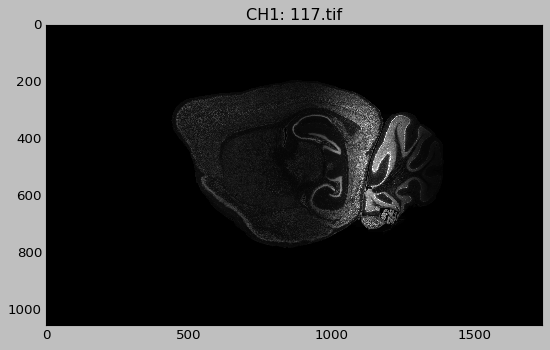

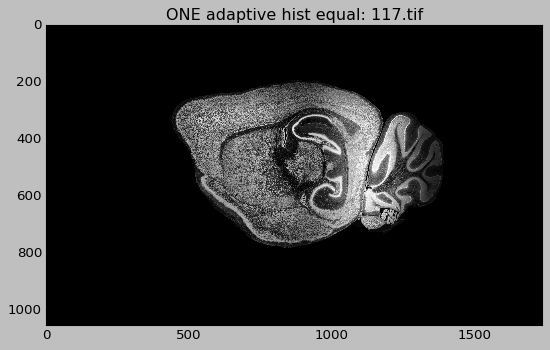

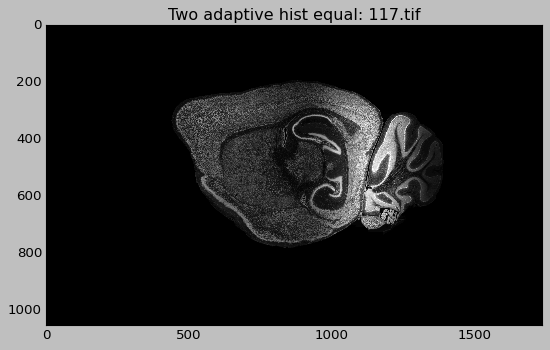

In [41]:
i = 116
# cleaned image
test_img = img_inputs[i]
plt.figure()
plt.rcParams.update({'figure.figsize': [8, 6]})
plt.title('CH1: {}'.format(files[i]))
plt.imshow(test_img, cmap='gray')
plt.show()
# normalized with IM
#normal_img = img_normal[i]
#plt.figure()
#plt.rcParams.update({'figure.figsize': [8, 6]})
#plt.title('regular normalized: {}'.format(files[i]))
#plt.imshow(normal_img, cmap='gray')
#plt.show()
# normalized opencv one adapt
adapt_img = img_one_adapt[i]
plt.figure()
plt.rcParams.update({'figure.figsize': [8, 6]})
plt.title('ONE adaptive hist equal: {}'.format(files[i]))
plt.imshow(adapt_img, cmap='gray')
plt.show()
# normalized opencv one adapt after IM norm
adapt2_img = img_two_adapt[i]
plt.figure()
plt.rcParams.update({'figure.figsize': [8, 6]})
plt.title('Two adaptive hist equal: {}'.format(files[i]))
plt.imshow(adapt2_img, cmap='gray')
plt.show()

